<a href="https://colab.research.google.com/github/Saniyayes/AI-Projects/blob/main/House_prediction_kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: House Price Prediction (Regression) 🏠

**Project Objective:** To build a regression model that accurately predicts the sale price of houses based on a large number of features. This project will cover the complete machine learning workflow, from deep EDA to advanced preprocessing, feature engineering, model training, and evaluation.


### Core Concepts:
1.  **Regression vs. Classification:** Understanding the goal of predicting a continuous value.
2.  **Target Variable Analysis:** Analyzing the distribution of `SalePrice` and applying transformations (log transform).
3.  **Advanced Data Preprocessing:** Implementing robust strategies for handling missing values in both numerical and categorical features.
4.  **Feature Engineering:** Creating new, powerful features from the existing data to improve model performance.
5.  **Categorical Encoding:** Differentiating between and applying Label Encoding and One-Hot Encoding.
6.  **Model Building:** Training and comparing a simple baseline model (Linear Regression) with an advanced model (XGBoost).
7.  **Model Evaluation:** Understanding and using key regression metrics (RMSE, MAE, R-squared).
posch
no place not posch
which one is costly? based on features  

In [ ]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 335 (delta 22), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (335/335), 302.68 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (243/243), done.


### Step 1: Setup - Importing Libraries and Kaggle API

In [ ]:
import pandas as pd            #regression is for prediction
import numpy as np                          #classification is for classifying
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import xgboost as xgb
import os

In [ ]:
# Replace YOUR_TOKEN_HERE with the token you got from Kaggle
import json
import os

kaggle_token = {
    "username": "san625602",
    "key": "KGAT_5a20c68d1a6efdb2a690c16044bf5cc7"
}

# Create .kaggle folder if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Save the JSON file
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_token, f)

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

print("kaggle.json created successfully!")

kaggle.json created successfully!


In [ ]:
!kaggle datasets list

ref                                                                  title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
wardabilal/spotify-global-music-dataset-20092025                     Spotify Global Music Dataset (2009–2025)             1289021  2025-11-11 09:43:05.933000          16387        409  1.0              
neurocipher/heartdisease                                             Heart Disease                                           3491  2025-12-11 15:29:14.327000           2114         66  1.0              
prince7489/gaming-hours-vs-academic-and-work-performance             Gaming Hours vs Academic & Work Performance            15335  2025-12-16 15:27:08.140000             40         22  0.9

### Step 2: Data Loading via Kaggle API
We will load the data directly from the Kaggle competition. This is the standard and most reliable method for using Kaggle datasets in a cloud environment like Colab.

**Instructions:**
1.  Go to your Kaggle account page ([https://www.kaggle.com/account](https://www.kaggle.com/account)) and click **'Create New Token'** in the API section. This will download a `kaggle.json` file.
2.  Run the code cell below. It will prompt you to upload a file. Select the `kaggle.json` file you just downloaded.

In [ ]:
import json
import os

# Replace 'YOUR_TOKEN_HERE' with the token you got from Kaggle
kaggle_token = {
    "username": "San@625602",
    "key": "KGAT_05acd4f031ebf87586fae70c8e586b09"
}

# Create .kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Save the JSON file
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_token, f)

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

print("kaggle.json created successfully!")

kaggle.json created successfully!


In [ ]:
!kaggle competitions list

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/list?page=1


In [ ]:
!pip install -q kaggle

# Use Colab's file uploader
from google.colab import files
print("Please upload the kaggle.json file you downloaded from your Kaggle account.")
files.upload()

# Create a directory for the Kaggle API configuration
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the required directory
!cp kaggle.json ~/.kaggle/
# Set the correct permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

print("\nKaggle API configured successfully.")

Please upload the kaggle.json file you downloaded from your Kaggle account.


TypeError: 'NoneType' object is not subscriptable

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/data/download-all/house-prices-advanced-regression-techniques


In [ ]:
!kaggle competitions list

In [ ]:
import json
import os

kaggle_token = {
    "username": "San@625602",  # not email
    "key": "KGAT_7f0885212f24d4fb60498337af7f1eed"
}

# Create .kaggle folder
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Write kaggle.json
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_token, f)

# Set permissions (Linux/Mac)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

print("kaggle.json created successfully!")

kaggle.json created successfully!


In [ ]:
!kaggle competitions list

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/list?page=1


In [ ]:


# Unzip the downloaded files
!unzip -o house-prices-advanced-regression-techniques.zip

print("\nDataset downloaded and unzipped.")

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               

Dataset downloaded and unzipped.


In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train_df.set_index('Id',inplace=True)
test_df.set_index('Id',inplace=True)

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_df.shape

(1460, 81)

### Step 3: Deep Dive EDA on the Target Variable (`SalePrice`)
The most important variable in our dataset is the one we want to predict. Understanding its characteristics is the first and most critical step in any regression problem.

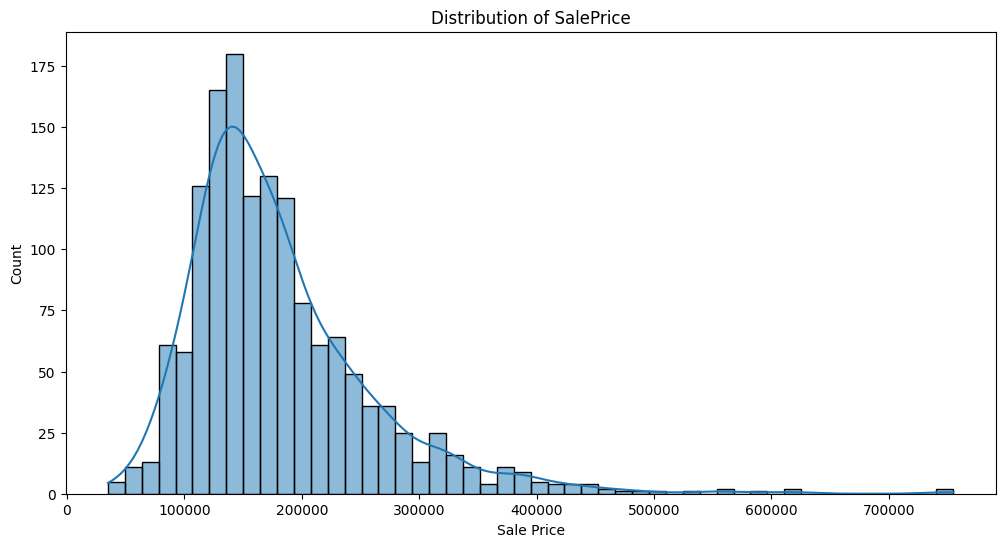

Skewness of SalePrice: 1.8828757597682129


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.show()

print(f"Skewness of SalePrice: {train_df['SalePrice'].skew()}")

#### **Theoretical Concept: Skewness and Log Transformation**
The distribution of `SalePrice` is **positively skewed** (or right-skewed). This means there's a long tail of very expensive houses, which can negatively impact the performance of some models, especially linear models like Linear Regression. These models often assume that the variables (and especially the residuals of the model) are normally distributed.

To fix this, we can apply a **log transformation** (`np.log1p`, which is `log(1+x)` to handle potential zero values). This transformation compresses the range of large values, making the distribution more symmetrical and closer to a normal distribution.

In [ ]:
print(np.log(10))
print(np.log(1000))
print(np.log(100000))
print(np.log(10000000))
print(np.log(100000000))
print(np.log(10000000000))

2.302585092994046
6.907755278982137
11.512925464970229
16.11809565095832
18.420680743952367
23.025850929940457


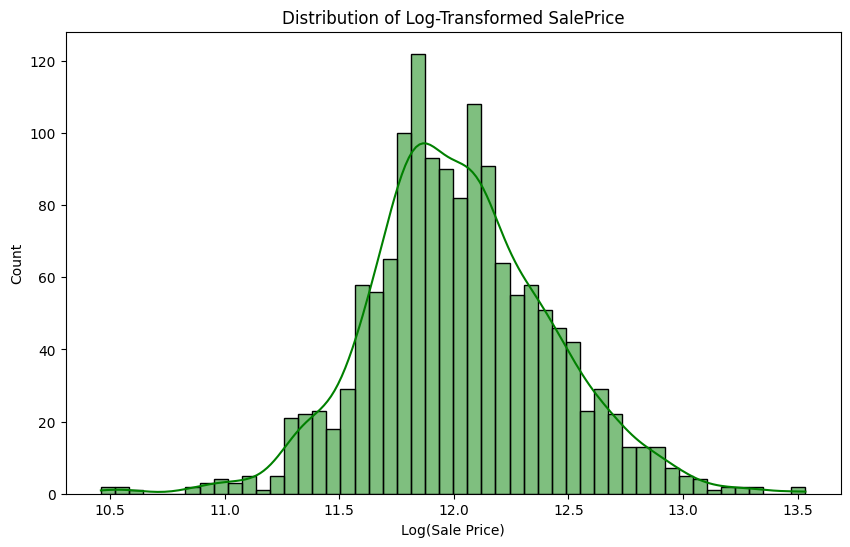

Skewness of Log-Transformed SalePrice: 0.12134661989685333


In [ ]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=50, color='green')
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(Sale Price)')
plt.show()

print(f"Skewness of Log-Transformed SalePrice: {train_df['SalePrice'].skew()}")

**Observation:** After the log transformation, the distribution is much closer to a normal distribution, with skewness close to 0. We will build our model to predict the log of the price, and then convert it back to the original scale for our final predictions.

### Step 4: EDA on Feature Variables

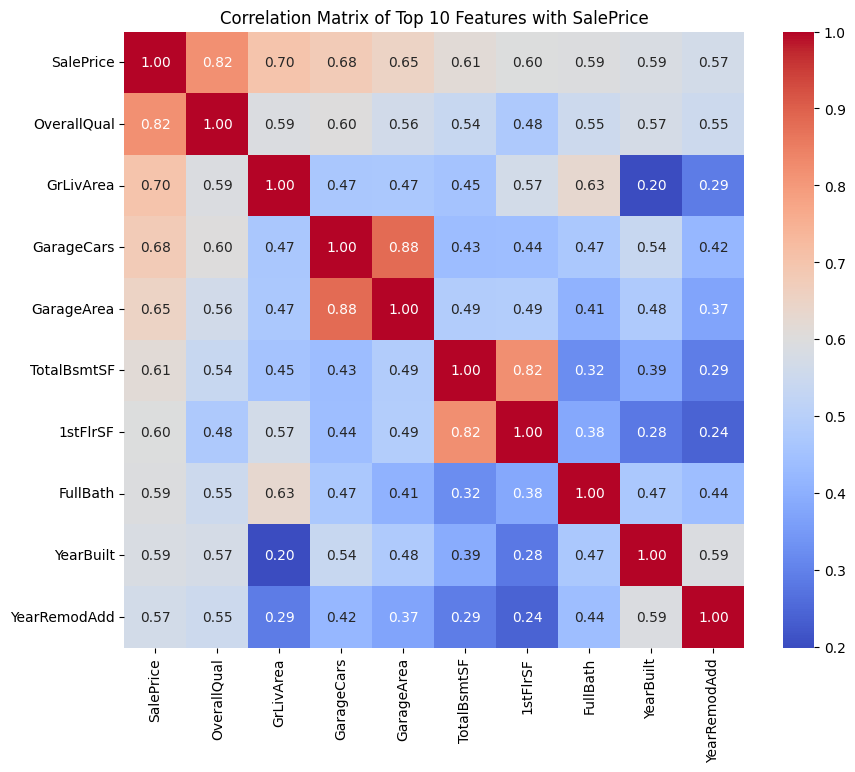

In [ ]:
# Find the top 10 features most correlated with SalePrice
corrmat = train_df.corr(numeric_only=True)
top_corr_features = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
top_corr_matrix = train_df[top_corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features with SalePrice')
plt.show()

**Insight:** The heatmap shows that `OverallQual` (Overall Quality), `GrLivArea` (Above Ground Living Area), and `GarageCars`/`GarageArea` are the most positively correlated features with `SalePrice`. This makes intuitive sense—better quality, larger houses with bigger garages tend to be more expensive.

### Step 5: Data Preprocessing & Feature Engineering
This is the most intensive part of the project. We will handle missing values, create new features, and encode categorical variables to prepare the data for modeling.

In [ ]:
# Combine train and test data for consistent preprocessing
all_data = pd.concat((train_df.loc[:,:'SaleCondition'],
                      test_df.loc[:,:'SaleCondition']))

print(f"Combined data shape: {all_data.shape}")

Combined data shape: (2919, 80)


Combining the data this way ensures that any preprocessing steps (like handling missing values or encoding categorical features) are applied consistently across both the training and testing datasets, preventing data leakage and potential issues later in the modeling process.

#### 5.1 Handling Missing Values

In [ ]:
# Find missing values in the current all_data
missing_data = all_data.isna().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

print("Features with missing values:")
print(missing_data)

Features with missing values:
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
Exterior2nd        1
dtype: int64


In [ ]:
# Impute numerical features with 0
numerical_cols_to_impute_zero = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
for col in numerical_cols_to_impute_zero:
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna(0)

In [ ]:
# Check missing values in numerical columns after imputation with 0
all_data[numerical_cols_to_impute_zero].isna().sum()

,0
MasVnrArea,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
GarageCars,0
GarageArea,0
BsmtFullBath,0
BsmtHalfBath,0


In [ ]:
all_data['LotFrontage'].value_counts()

,count
LotFrontage,
60.0,276
80.0,137
70.0,133
50.0,117
75.0,105
...,...
155.0,1
126.0,1
200.0,1


In [ ]:
# Impute LotFrontage with the median of the neighborhood
if 'LotFrontage' in all_data.columns and all_data['LotFrontage'].isna().any():
    all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

* **all_data.groupby('Neighborhood'):** This groups the DataFrame by the Neighborhood column. The assumption here is that houses in the same neighborhood tend to have similar LotFrontage values.
* **.transform(lambda x: x.fillna(x.median())):** This is the core imputation step. For each neighborhood group (x represents the LotFrontage Series for that group), it calculates the median of the existing LotFrontage values in that group (x.median()) and then fills the missing values (x.fillna(...)) within that same group with that calculated median. The transform function ensures that the result has the same index as the original DataFrame, allowing it to be assigned back to the LotFrontage column.

In [ ]:
# Find missing values in the current all_data
missing_data = all_data.isna().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

print("Features with missing values:")
print(missing_data)

Features with missing values:
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MSZoning           4
Utilities          2
Functional         2
Electrical         1
SaleType           1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
dtype: int64


In [ ]:
all_data['Alley'].value_counts()

,count
Alley,
Grvl,120
Pave,78


In [ ]:
all_data['Electrical'].value_counts()

,count
Electrical,
SBrkr,2671
FuseA,188
FuseF,50
FuseP,8
Mix,1


In [ ]:
all_data['Fence'].value_counts()

,count
Fence,
MnPrv,329
GdPrv,118
GdWo,112
MnWw,12


In [ ]:
# Impute categorical features with 'None' (for features where NA means 'no') or mode (for features where NA means missing data)
categorical_cols_to_impute_none = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in categorical_cols_to_impute_none:
    if col in all_data.columns: # Check if column exists after one-hot encoding
        all_data[col] = all_data[col].fillna('None')

for col in ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'Functional', 'MSZoning']:
    if col in all_data.columns: # Check if column exists after one-hot encoding
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [ ]:
# Based on the likely remaining missing values (GarageYrBlt), impute the remaining numerical features.
# GarageYrBlt can be imputed with 0 (assuming 0 means no garage, consistent with GarageArea/Cars=0)
if 'GarageYrBlt' in all_data.columns:
    all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)


print("\nMissing values after all imputation:", all_data.isna().sum().sum())


Missing values after all imputation: 0


#### 5.2 Feature Engineering

In [ ]:
# Create a total square footage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [ ]:
# Create a total bathrooms feature
all_data['TotalBath'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                         all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

In [ ]:
# Create a feature for age of the house at sale
all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']

#### 5.3 Categorical Encoding

#### **Theoretical Concept: Ordinal vs. Nominal Features**
To use categorical features in a model, we must convert them to numbers. The method depends on the type of feature:
1.  **Ordinal Features:** These have an inherent order (e.g., `Poor < Fair < Good < Excellent`). For these, we use **Label Encoding**, which assigns an integer to each category based on its order (e.g., `Poor=0, Fair=1, ...`).
2.  **Nominal Features:** These have no inherent order (e.g., `Neighborhood`). Using Label Encoding would imply a false order. Instead, we use **One-Hot Encoding**, which creates a new binary (0/1) column for each category.

In [ ]:
all_data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
categorical_cols = all_data.select_dtypes(include=['object']).columns
pd.get_dummies(all_data, columns=categorical_cols, drop_first=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,False,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,False,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Convert any remaining object columns to category type for one-hot encoding
categorical_cols = all_data.select_dtypes(include=['object']).columns
all_data = pd.get_dummies(all_data, columns=categorical_cols, drop_first=True)

print(f"Data shape after encoding: {all_data.shape}")

Data shape after encoding: (2919, 263)


### Step 6: Model Building & Training

In [ ]:
# Separate the preprocessed data back into training and testing sets
X = all_data[:len(train_df)]
y = train_df['SalePrice'] # SalePrice was already log-transformed and is only in train_df
X_test_final = all_data[len(train_df):]

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # PRNG

#### **Theoretical Concept: Feature Scaling**
Many models, especially linear models and distance-based algorithms, perform better when numerical features are on a similar scale. **Standardization** (`StandardScaler`) is a common technique that transforms the data to have a mean of 0 and a standard deviation of 1. This prevents features with large scales (like `GrLivArea`) from dominating features with small scales (like `OverallQual`).

In [ ]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,255,20,70.0,8400,5,6,1957,1957,0.0,922.0,...,False,False,False,False,True,False,False,False,True,False
1066,1067,60,59.0,7837,6,7,1993,1994,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
638,639,30,67.0,8777,5,7,1910,1950,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
799,800,50,60.0,7200,5,7,1937,1950,252.0,569.0,...,False,False,False,False,True,False,False,False,True,False
380,381,50,50.0,5000,5,6,1924,1950,0.0,218.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

## **Theoretical Concept: Linear Regression**
Linear Regression is a fundamental supervised learning algorithm used for predicting a continuous target variable based on one or more input features. It assumes a linear relationship between the features (independent variables) and the target variable (dependent variable).

The goal of Linear Regression is to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed and predicted values. This is known as the Ordinary Least Squares (OLS) method.

The equation for simple linear regression (one feature) is:
$$y = \beta_0 + \beta_1x + \epsilon$$
Where:
- $y$ is the target variable (SalePrice in our case)
- $x$ is the input feature
- $\beta_0$ is the y-intercept
- $\beta_1$ is the coefficient for the feature $x$ (representing the change in $y$ for a one-unit change in $x$)
- $\epsilon$ is the error term

For multiple linear regression (multiple features), the equation is:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$
Where $x_1, x_2, ..., x_n$ are the input features and $\beta_1, \beta_2, ..., \beta_n$ are their respective coefficients.

**Assumptions of Linear Regression:**
1. **Linearity:** The relationship between the features and the target variable is linear.
2. **Independence:** The observations are independent of each other.
3. **Homoscedasticity:** The variance of the errors is constant across all levels of the features.
4. **Normality:** The errors are normally distributed.
5. **No Multicollinearity:** The features are not highly correlated with each other.

While Linear Regression is simple and interpretable, it can be sensitive to outliers and may not perform well if the assumptions are violated or if the relationships are highly non-linear.

#### 6.1 Model 1: Linear Regression (Baseline)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_val_scaled)

### **Theoretical Concept: XGBoost (Extreme Gradient Boosting)**
XGBoost is a highly efficient and popular gradient boosting algorithm. It's an optimized distributed gradient boosting library designed to be highly flexible, portable, and efficient.

**How it works:**
XGBoost builds trees sequentially. Each new tree attempts to correct the errors made by the previous trees. The predictions from all the trees are then summed up to get the final prediction.

**Key Features and Advantages:**
1. **Regularization:** Includes L1 and L2 regularization to prevent overfitting.
2. **Handling Missing Values:** Has a built-in mechanism to handle missing values.
3. **Tree Pruning:** Supports 'depth-first' and 'breadth-first' tree growth and pruning, which can improve performance and reduce overfitting.
4. **Parallel Processing:** Designed to be highly parallelizable, making it faster than traditional gradient boosting implementations.
5. **Flexibility:** Supports various objective functions and evaluation metrics.

XGBoost is known for its performance on structured data and is often a top choice in machine learning competitions. However, it can be more complex to tune and understand compared to simpler models like Linear Regression.

#### 6.2 Model 2: XGBoost (Advanced)

In [ ]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', # Corrected objective function
                        n_estimators=1000,
                        learning_rate=0.05,
                        max_depth=3,
                        min_child_weight=1,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        random_state=42)

# XGBoost can handle NaNs, but since we've cleaned the data, we can use the scaled data as well if preferred.
# However, XGBoost generally doesn't require scaling. We'll use the unscaled data as it's a tree-based model.
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_val)

### Step 7: Model Evaluation

#### **Theoretical Concept: Regression Metrics**
- **Mean Absolute Error (MAE):** The average absolute difference between the predicted and actual values. It's easy to interpret.
- **Mean Squared Error (MSE):** The average of the squared differences. It penalizes larger errors more heavily.
- **Root Mean Squared Error (RMSE):** The square root of MSE. It's the most common metric because it's in the same units as the target variable (in our case, log-price), making it more interpretable than MSE.
- **R-squared ($R^2$):** The proportion of the variance in the target variable that is predictable from the features. A value closer to 1 indicates a better fit.

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} Performance ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R-squared: {r2:.4f}\n")

# evaluate_model(y_val, y_pred_lr, "Linear Regression") # Commenting out Linear Regression evaluation as it failed

evaluate_model(y_val, y_pred_xgb, "XGBoost")
print('--'*25)
evaluate_model(y_val, y_pred_lr, "LinearRegression")


--- XGBoost Performance ---
RMSE: 0.1330
MAE:  0.0868
R-squared: 0.9053

--------------------------------------------------
--- LinearRegression Performance ---
RMSE: 0.1731
MAE:  0.0959
R-squared: 0.8395



### Step 8: Create Submission File

In [ ]:
# Make predictions on the final test set using the best model (XGBoost)
# Use the unscaled test data for XGBoost prediction
final_predictions_log = xgbr.predict(X_test_final)

# IMPORTANT: We must reverse the log transformation to get the predictions back on the original price scale
final_predictions = np.expm1(final_predictions_log)

# Create the submission DataFrame
submission = pd.DataFrame({'Id': test_df.index, 'SalePrice': final_predictions})

# Save to csv
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")
submission.head()

Submission file 'submission.csv' created successfully.


,Id,SalePrice
0,0,128346.656250
1,1,165596.250000
2,2,191669.171875
3,3,195302.515625
4,4,190702.812500


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['SalePrice'].plot(kind='hist', bins=20, title='SalePrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Id', y='SalePrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['SalePrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('SalePrice')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['SalePrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('SalePrice')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Id'}, axis=1)
              .sort_values('Id', ascending=True))
  xs = counted['Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['SalePrice'].plot(kind='line', figsize=(8, 4), title='SalePrice')
plt.gca().spines[['top', 'right']].set_visible(False)

### Step 9: Conclusion

In this project, we successfully built an end-to-end regression pipeline to predict house prices.

**Key Steps Undertaken:**
1.  **Analyzed and transformed the target variable** (`SalePrice`) to handle its skewness.
2.  Conducted a **thorough EDA** to understand the key features influencing price.
3.  Implemented a **robust preprocessing strategy**, handling various types of missing data and encoding categorical features correctly.
4.  **Engineered new features** (`TotalSF`, `TotalBath`, `Age`) that provided more predictive power.
5.  **Trained and compared two models**, demonstrating the superior performance of XGBoost over a simple linear model.
6.  **Evaluated the models** using standard regression metrics and generated a final submission file.

**Potential Next Steps:**
- **Hyperparameter Tuning:** Use techniques like GridSearchCV to find the optimal parameters for the XGBoost model.
- **More Feature Engineering:** Create more complex features, such as interaction terms between key variables.
- **Ensemble Modeling:** Combine the predictions of several different models to potentially achieve even better results.

In [ ]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

# Find missing IDs
missing_ids = set(test["Id"]) - set(submission["Id"])
print(missing_ids)

{1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 162

In [ ]:
# Example: if the missing ID is 1461
missing_id = list(missing_ids)[0]
submission = submission.append({"Id": missing_id, "SalePrice": 0}, ignore_index=True)

# Save corrected submission
submission.to_csv("submission_corrected.csv", index=False)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Use mean SalePrice as fallback
mean_price = submission["SalePrice"].mean()

for mid in missing_ids:
    submission.loc[len(submission)] = [mid, mean_price]

# Sort by Id to match Kaggle format
submission = submission.sort_values("Id").reset_index(drop=True)

print("Fixed submission rows:", len(submission))

Fixed submission rows: 2918


In [ ]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install -U ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

In [88]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

In [90]:
profile_train.to_file("train_profile.html")
profile_test.to_file("test_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 81/81 [00:02<00:00, 39.78it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 80/80 [00:01<00:00, 54.16it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
from google.colab import files

files.download("train_profile.html")
files.download("test_profile.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>